In [1]:
from causal_nh.utils import generate_synthetic_dataset, plot_sample_ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
import pickle

In [2]:
%matplotlib inline

In [31]:
dim_process = 5
A = np.random.random((dim_process, dim_process))
A[A <= 0.5] = 0.2
A[A > 0.5] = 0
dataset, intensities = generate_synthetic_dataset(type_size=dim_process,
                                                  adjacency=A,
                                                  len_dataset=1000,
                                                  baseline_intensity=0.5)

In [42]:
def safe_dataset(dataset_name, dataset, dim_process, A, intensities):
    path = f'../../data/data_{dataset_name}/'
    
    train = dataset[:900]
    dev = dataset[900:950]
    test = dataset[950:]
    
    with open(path + 'train.pkl', 'wb') as f:
        pickle.dump({'train': train, 
                     'intensities': intensities[:900],
                     'dim_process': dim_process}, f)

    with open(path + 'dev.pkl', 'wb') as f:
        pickle.dump({'dev': dev, 
                     'intensities': intensities[900:950],
                     'dim_process': dim_process}, f)

    with open(path + 'test.pkl', 'wb') as f:
        pickle.dump({'test': test, 
                     'intensities': intensities[950],
                     'dim_process': dim_process}, f)
        
    with open(path + 'A.pkl', 'wb') as f:
        pickle.dump({'A': A}, f)

        

In [43]:
safe_dataset('synth_5_events', dataset, dim_process, A, intensities)

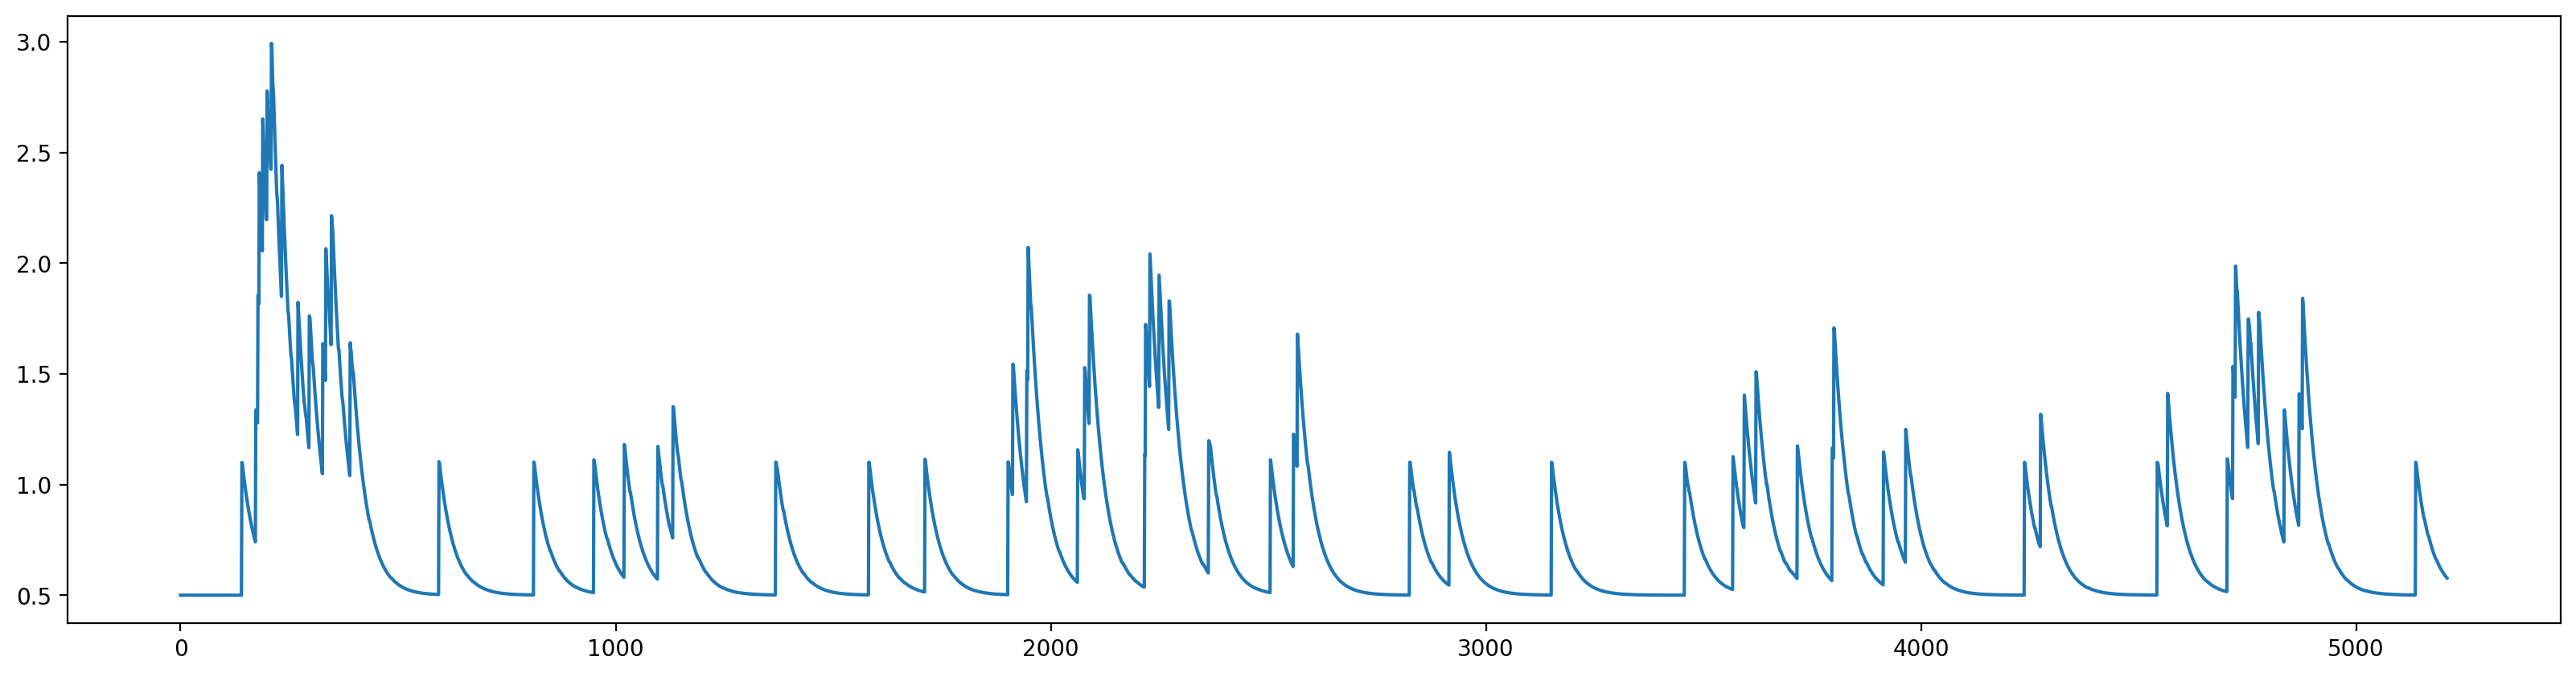

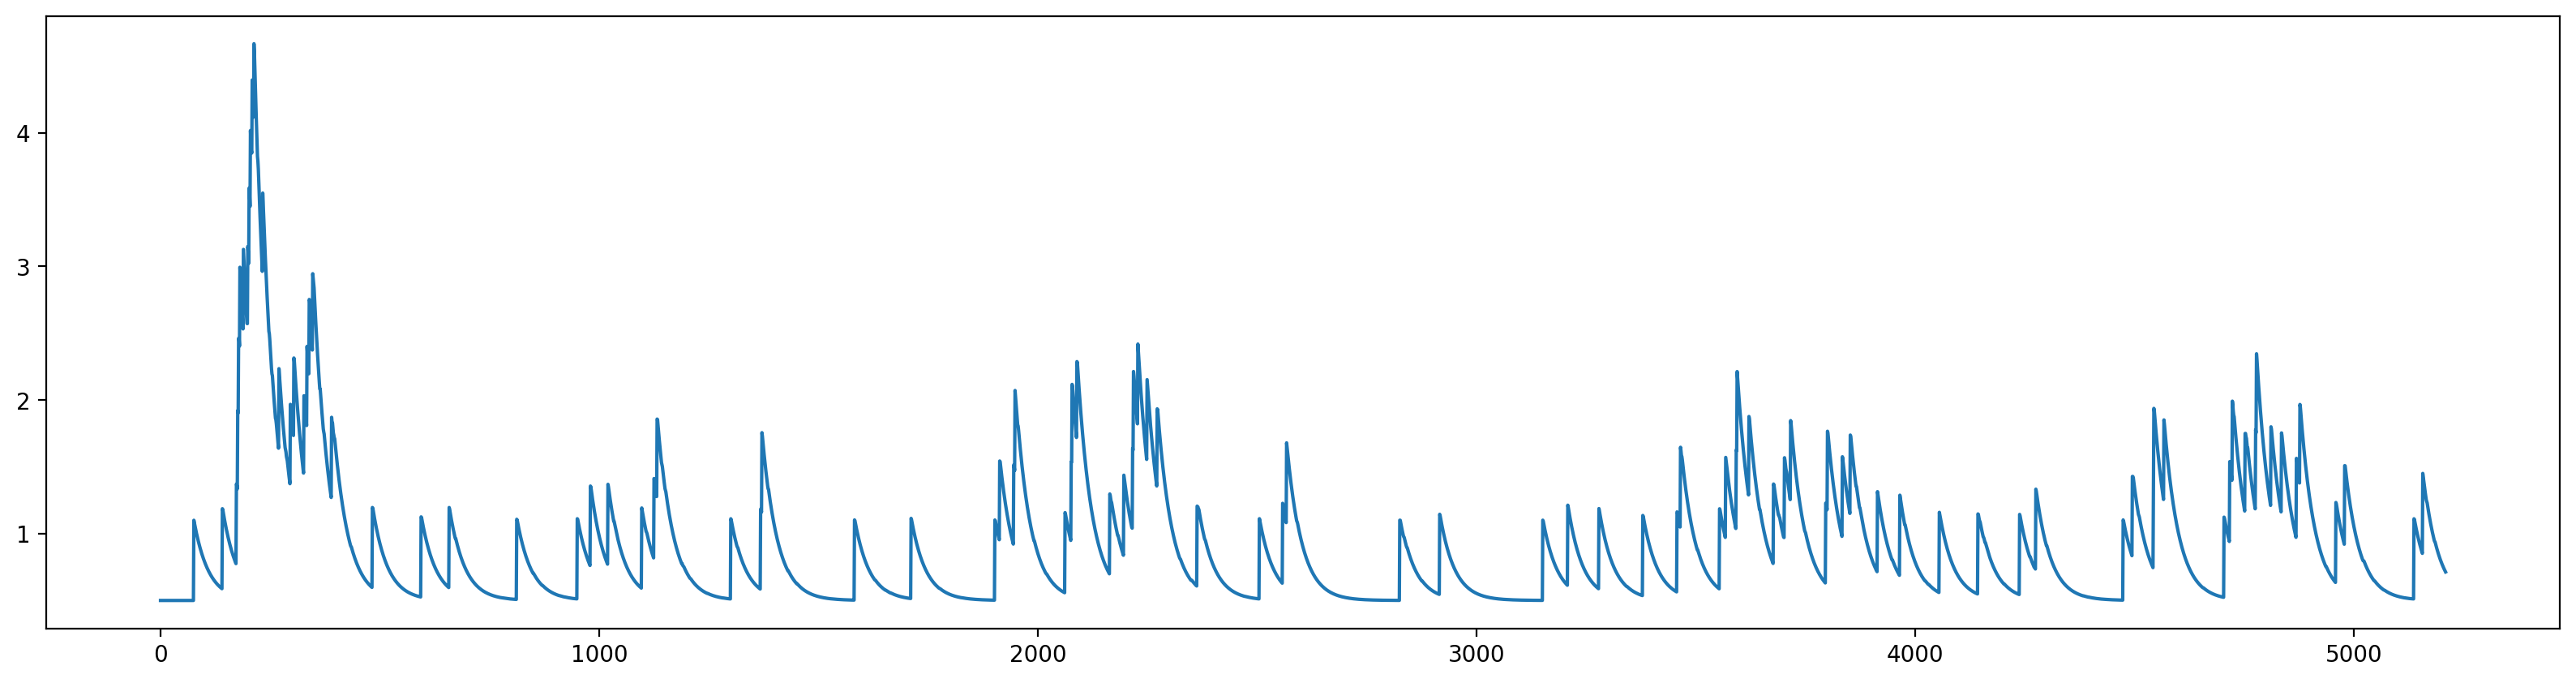

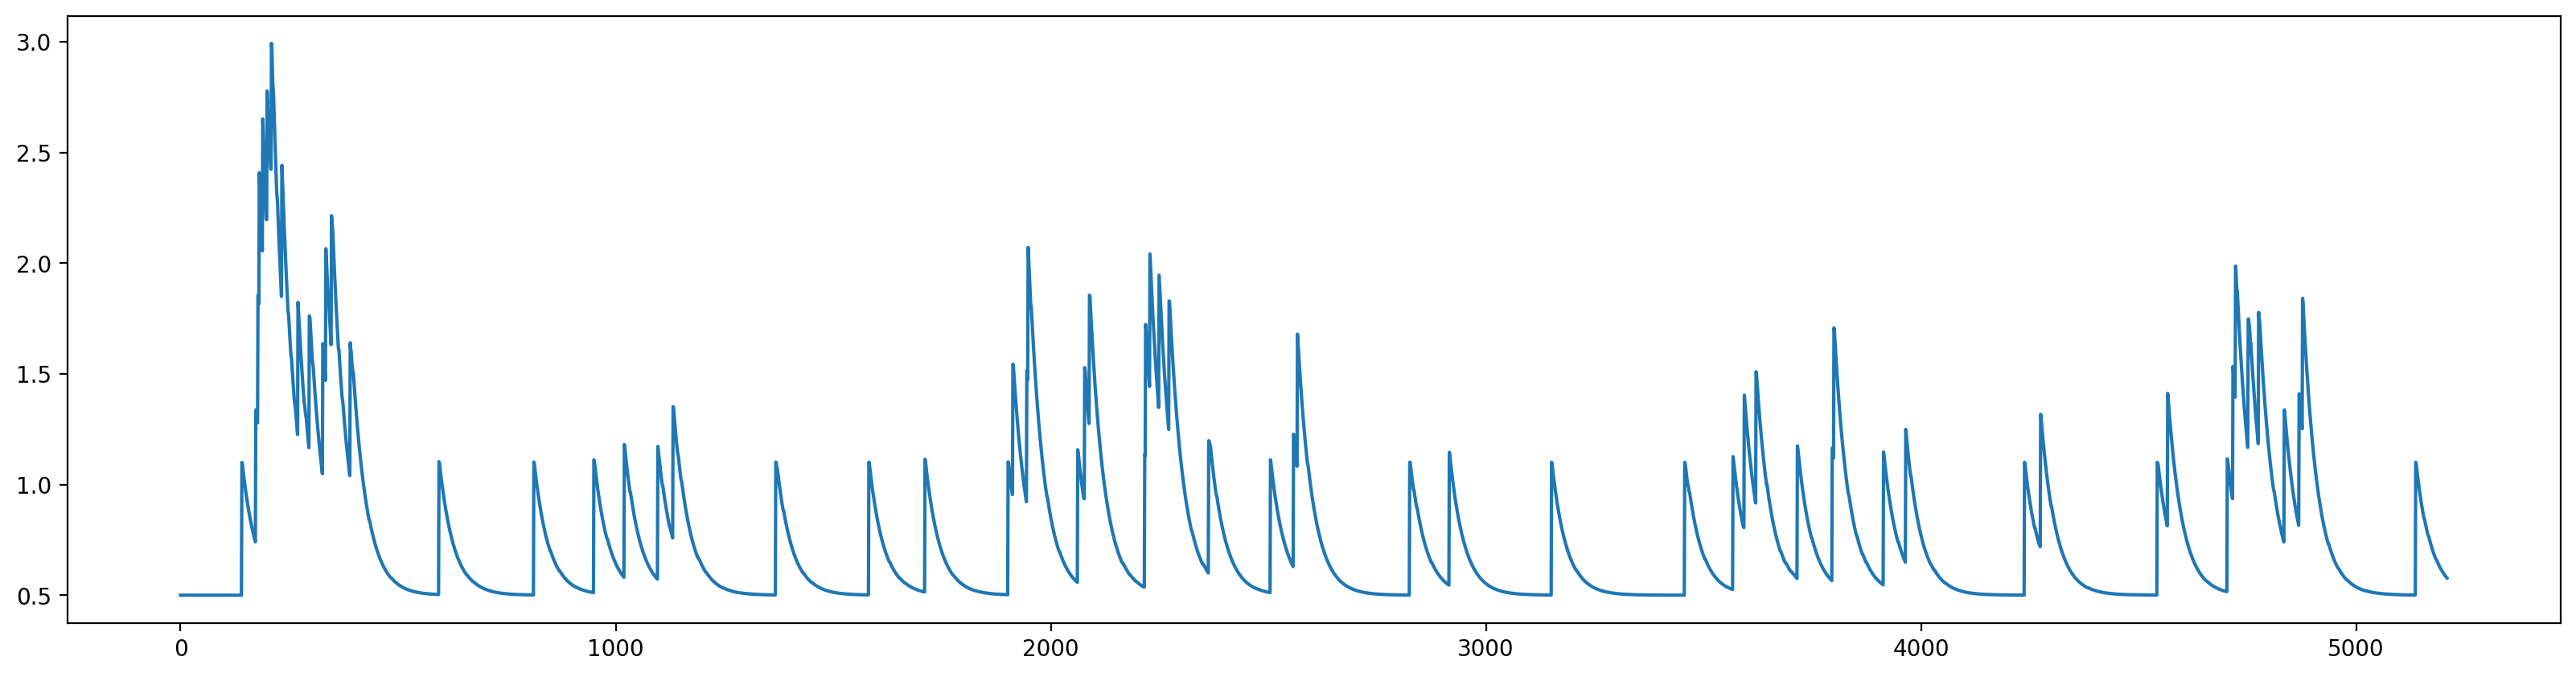

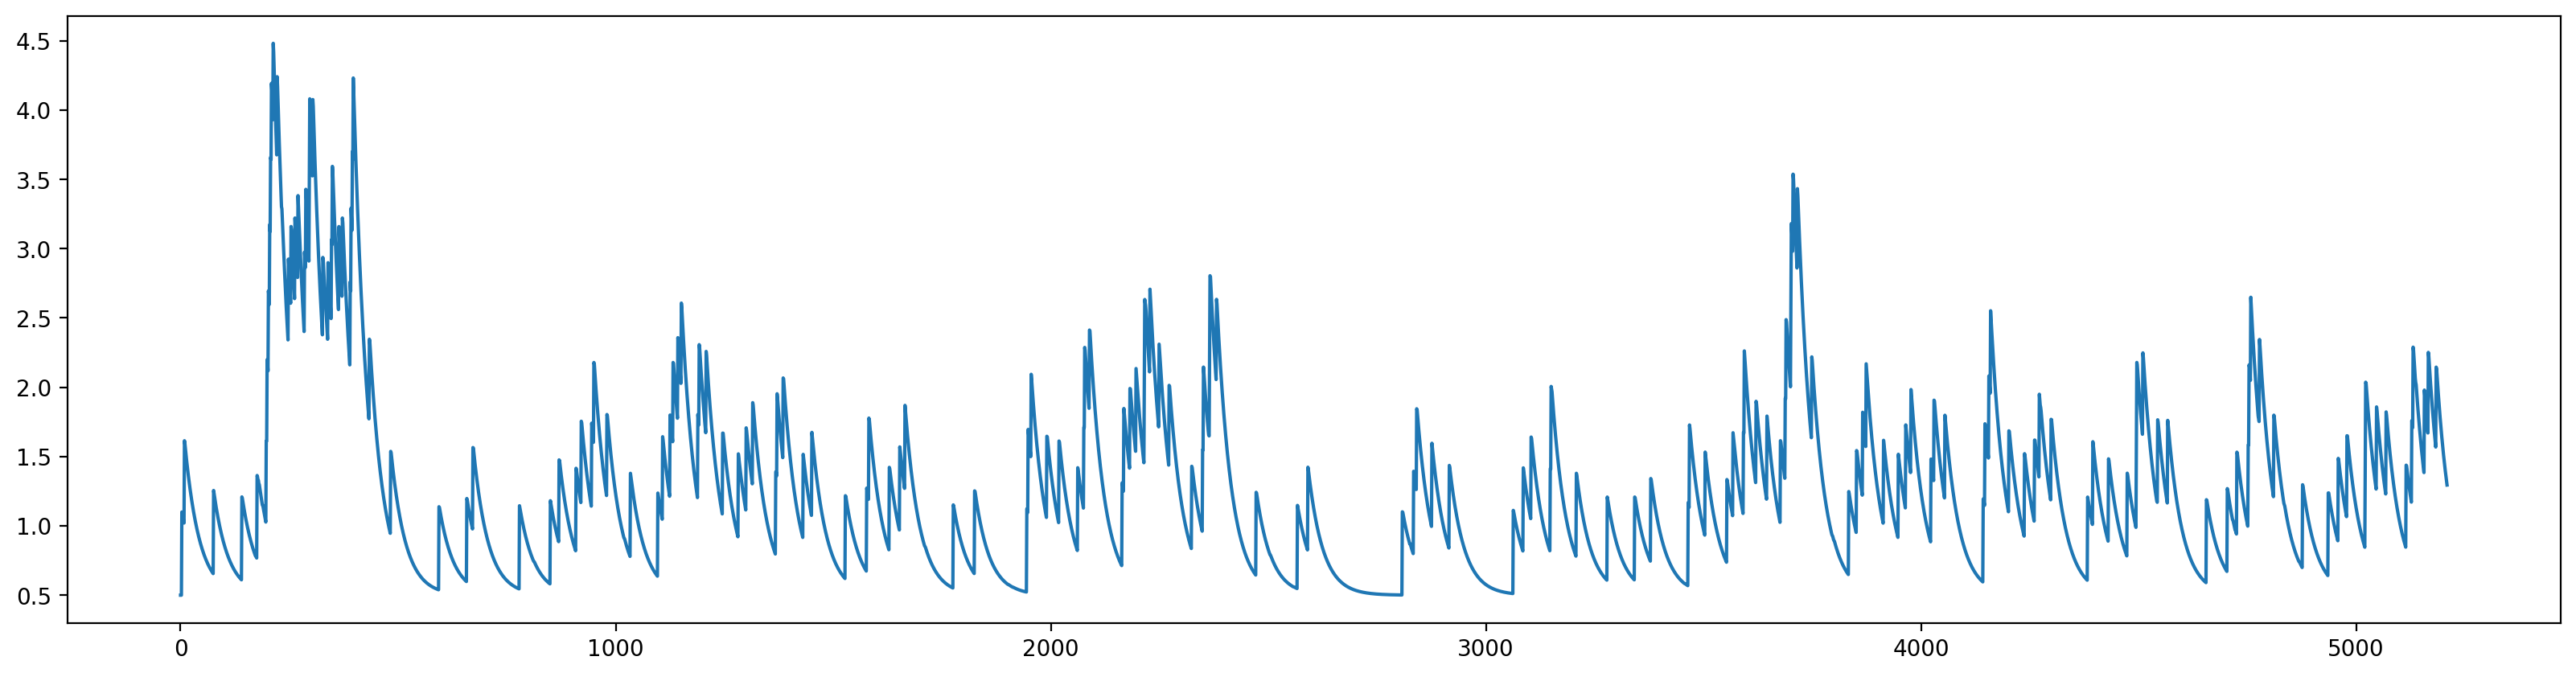

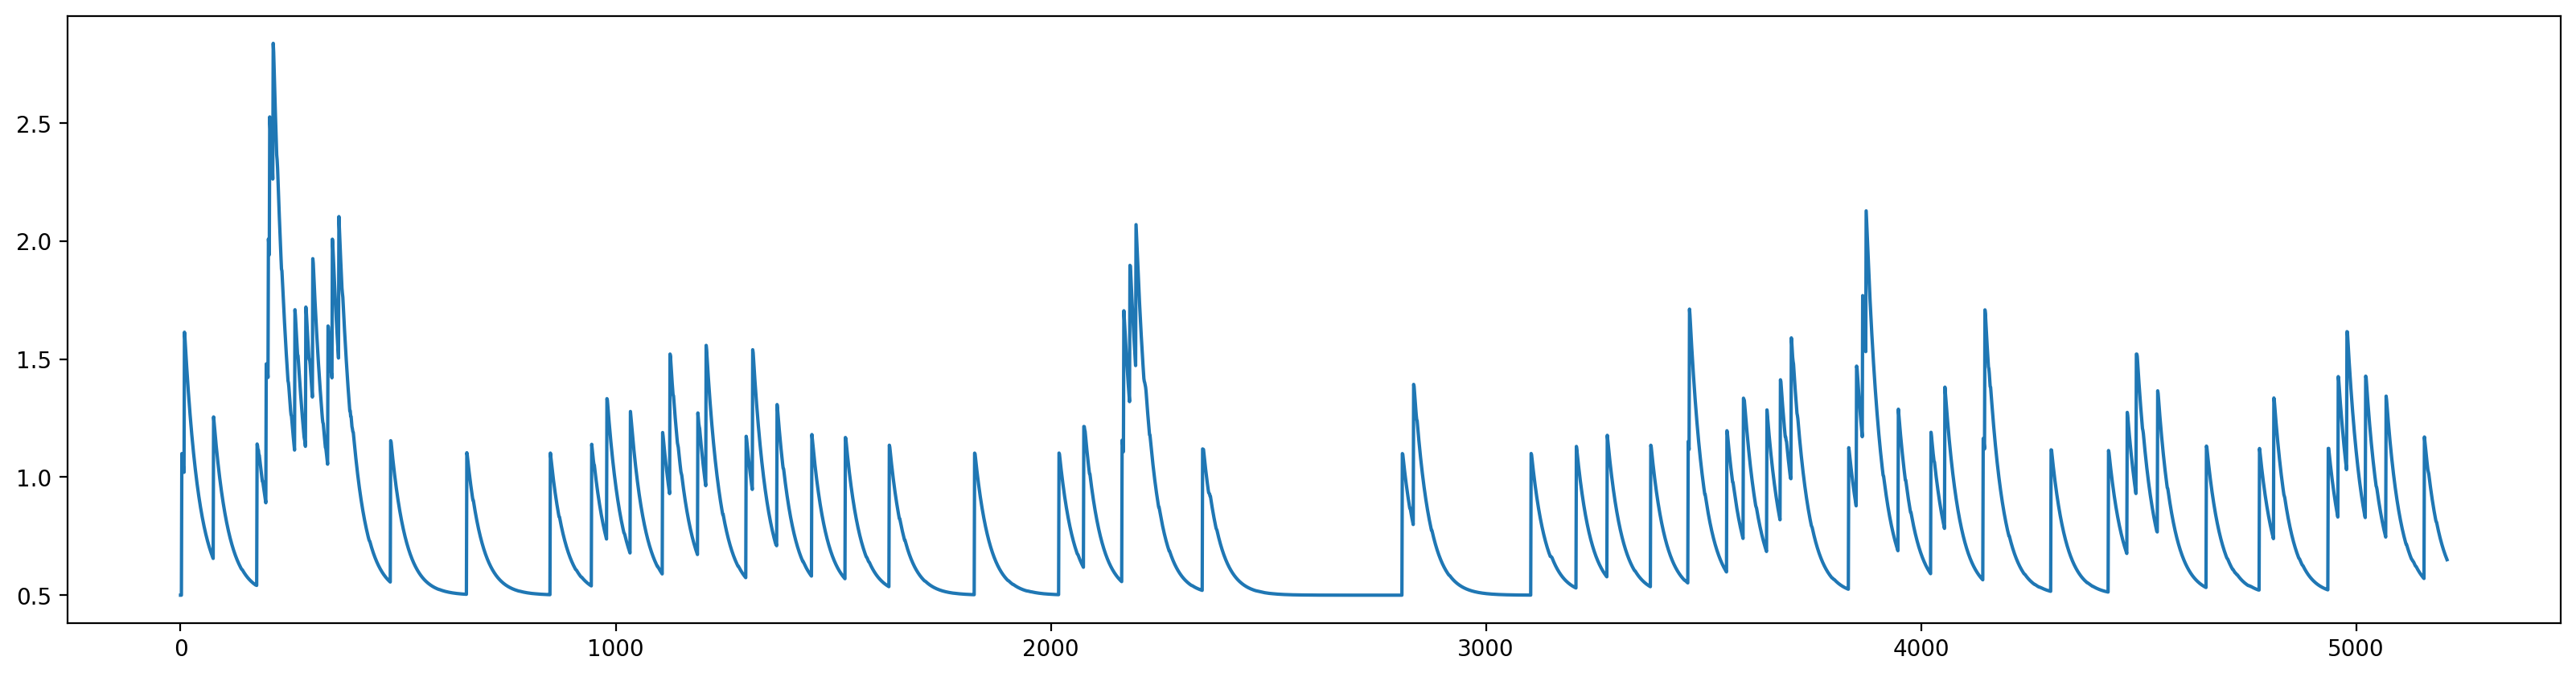

In [27]:
for intensity in intensities[0]:
    plt.figure(figsize=(20, 5), dpi=200)
    plt.plot(intensity)
    plt.show()

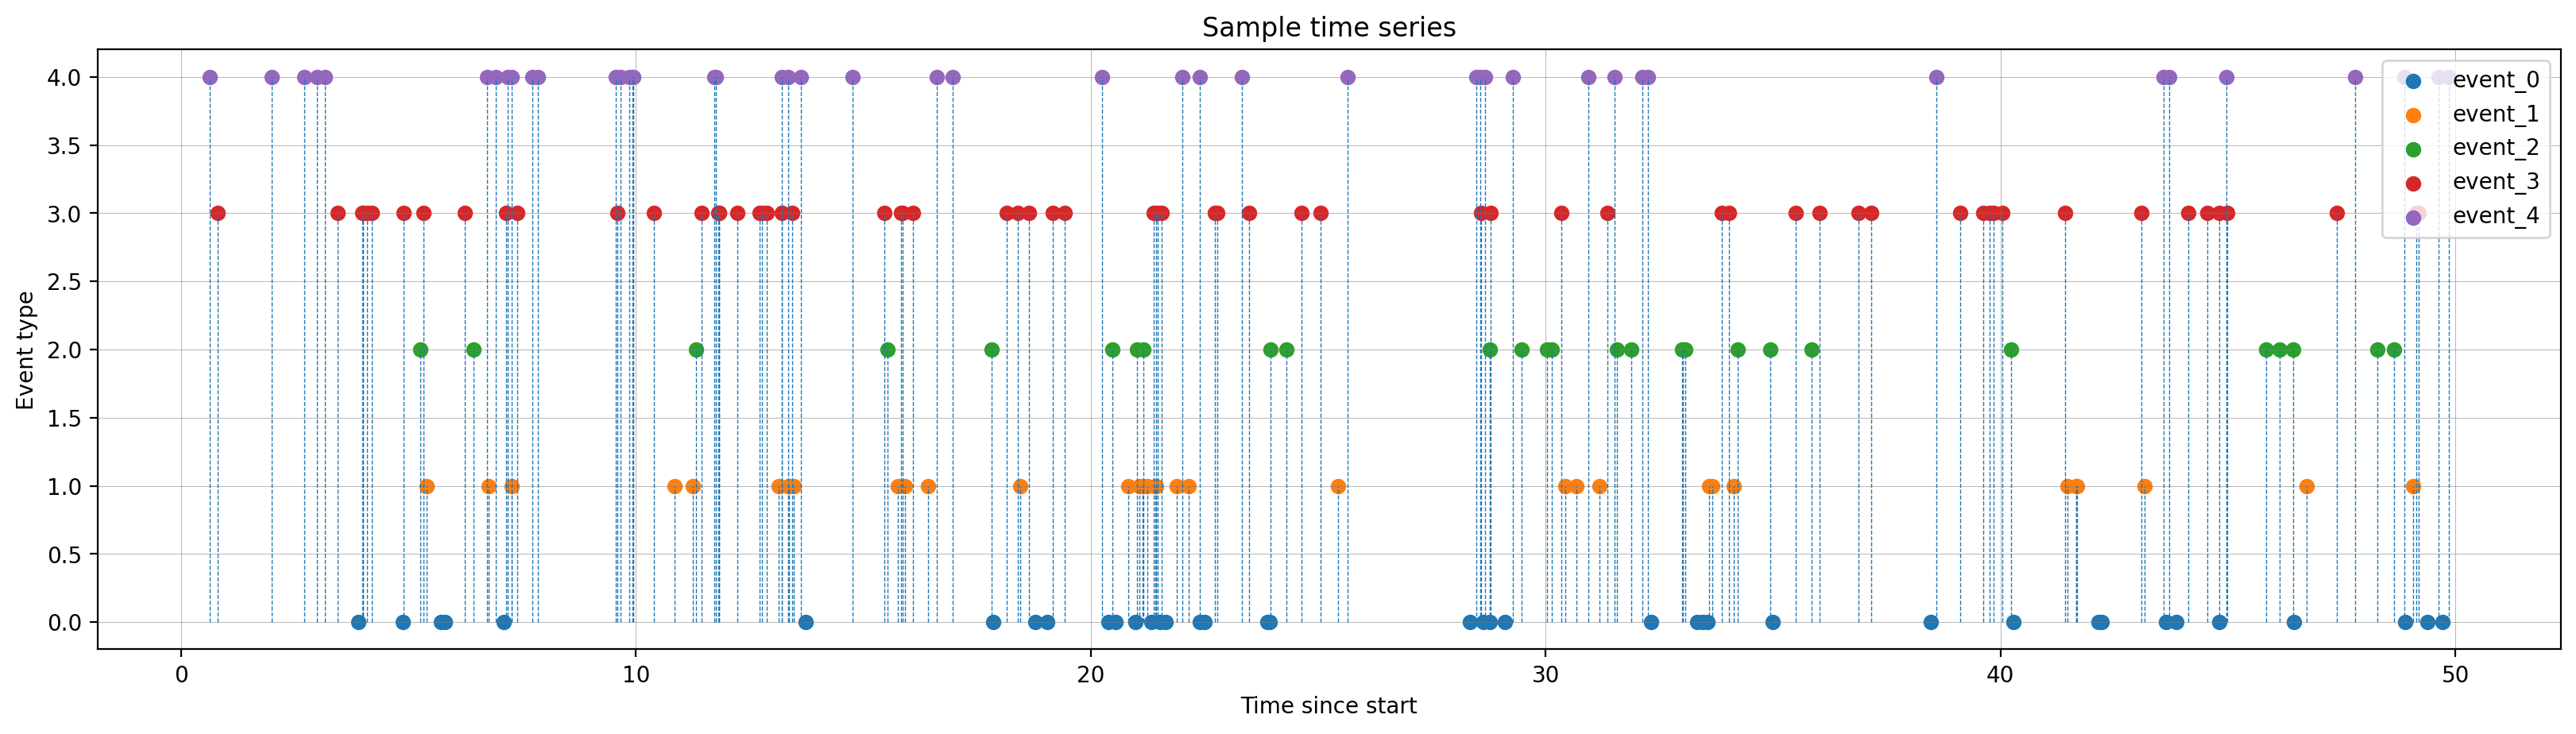

In [28]:
plot_sample_ts(dataset, 6, dim_process)